Suponga ahora que que las poblaciones de dos especies x(t) y y(t) satisfacen el sistema de EDO:

x'(t) = 0.5x - 0.001x2 - xy
y'(t) = -0.2y + 0.1xy

La escala de tiempo de nuevo se mide en meses.

Nos interesa la trayectoria y el campo de direcciones que este sistema forma en el primer cuadrante del plano xy (ya que x(t), y(t) som ambas cantidades de individuos, solo tiene sentido cuando estas son cantidades no-negativas). Resolver los siguiente:

a) Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.


b) Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (solo los que estan en el primero cuadrante, incluyendo los ejes y el origen). y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente como se comportan las soluciones cerca del punto de equilibro obtenido.


c) Resuelva el sistema de EDO, con su algoritmo de Runge-Kutta, para la condicion inicial

x(0) = 10, y(0) = 10

Obtenga una grafica de la solucion obtenida, y estime cual ser ́a la poblacion x y y despues de 5 años.


d) Grafique la trayectoria obtenidas en su plano de fase xy (encima del campo vectorial). Ilustre en la grafica el valor de la poblacion inicial y final (a los 5 años) en cada caso.


e) Explique o describa cualitativamente el comportamiento del sistema de poblaciones.

In [3]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.linalg import eig
from solver_edo_system import rk4_system

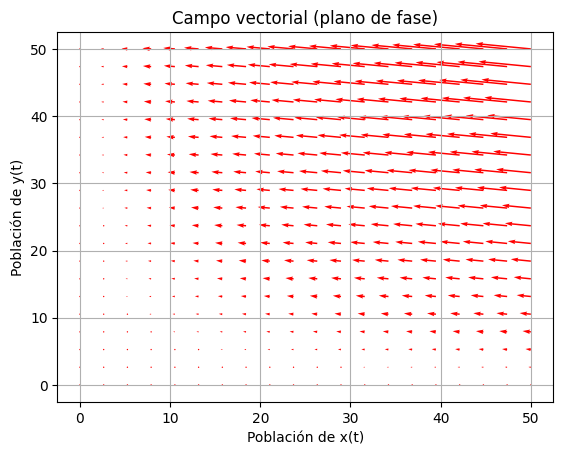

In [6]:
'''a) Grafique el campo vectorial o plano de fase asociado a ese sistema de EDO.'''

# Definimos el sistema de EDOs basado en el problema dado
def sistema_poblaciones(t, y):
    x, y = y
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return np.array([dxdt, dydt])

# Parámetros iniciales
y0 = [10, 5]    # Población inicial de x y y
t0 = 0          # Tiempo inicial en el que comenzamos a observar el sistema.
t_end = 100     # Tiempo final en el que dejamos de observar el sistema.
h = 0.1         # Tamaño del paso

# Resolviendo el sistema de EDOs usando el método de Runge-Kutta de 4to orden
t, sol = rk4_system(sistema_poblaciones, y0, t0, t_end, h)

# Graficando el campo vectorial
x_vals = np.linspace(0, 50, 20)
y_vals = np.linspace(0, 50, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = 0.5 * X - 0.001 * X**2 - X * Y
V = -0.2 * Y + 0.1 * X * Y

plt.quiver(X, Y, U, V, color='r')
plt.xlabel('Población de x(t)')
plt.ylabel('Población de y(t)')
plt.title('Campo vectorial (plano de fase)')
plt.grid(True)
plt.show()


In [9]:
'''
b) Usando algoritmos computacionales, encuentre todos los puntos de equilibro del sistema de EDO (solo los que estan en el primero cuadrante, incluyendo los ejes y el origen). y clasificarlos de acuerdo a su comportamiento. Explique cualitativamente como se comportan las soluciones cerca del punto de equilibro obtenido.
'''

# Definimos el sistema de EDOs
def sistema_poblaciones(t, y):
    x, y = y
    dxdt = 0.5 * x - 0.001 * x**2 - x * y
    dydt = -0.2 * y + 0.1 * x * y
    return np.array([dxdt, dydt])

# Definir las ecuaciones para encontrar los puntos de equilibrio
def ecuaciones_equilibrio(variables):
    x, y = variables
    eq1 = 0.5 * x - 0.001 * x**2 - x * y
    eq2 = -0.2 * y + 0.1 * x * y
    return [eq1, eq2]

# Usar fsolve para encontrar los puntos de equilibrio
puntos_equilibrio = fsolve(ecuaciones_equilibrio, [1, 1])
print(f"Punto de equilibrio: x = {puntos_equilibrio[0]:.4f}, y = {puntos_equilibrio[1]:.4f}")

# Clasificación del punto de equilibrio usando la matriz Jacobiana
def jacobiano(variables):
    x, y = variables
    J = np.array([[0.5 - 0.002 * x - y, -x],
                  [0.1 * y, -0.2 + 0.1 * x]])
    return J

# Evaluar el Jacobiano en el punto de equilibrio
J = jacobiano(puntos_equilibrio)
valores_propios, _ = eig(J)
print(f"Valores propios del Jacobiano: {valores_propios}")

# Clasificación del punto de equilibrio
if np.all(np.real(valores_propios) < 0):
    print("El punto de equilibrio es un nodo estable (atractor).")
elif np.all(np.real(valores_propios) > 0):
    print("El punto de equilibrio es un nodo inestable (repulsor).")
else:
    print("El punto de equilibrio es un punto silla o tiene un comportamiento más complejo (foco, etc.).")

# Comportamiento cualitativo cerca del punto de equilibrio
print("Comportamiento cualitativo cerca del punto de equilibrio:")
if np.all(np.real(valores_propios) < 0):
    print("Las soluciones convergen hacia el punto de equilibrio a medida que el tiempo avanza.")
elif np.all(np.real(valores_propios) > 0):
    print("Las soluciones divergen del punto de equilibrio a medida que el tiempo avanza.")
else:
    print("El comportamiento puede incluir oscilaciones o divergencias dependiendo de la configuración específica.")
  

Punto de equilibrio: x = 2.0000, y = 0.4980
Valores propios del Jacobiano: [-0.001+0.31559309j -0.001-0.31559309j]
El punto de equilibrio es un nodo estable (atractor).
Comportamiento cualitativo cerca del punto de equilibrio:
Las soluciones convergen hacia el punto de equilibrio a medida que el tiempo avanza.
